# `Banknotes Authentication Model`

In [25]:
# import the library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### `Load Data`

In [26]:
# load the dataset
df = pd.read_csv('BankNote_Authentication.csv')
# check the data
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [27]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


### `Data Preprocessing`

In [28]:
# rename the columns
df.rename(columns={'curtosis':'kurtosis'}, inplace=True)
# check the columns
df.columns

Index(['variance', 'skewness', 'kurtosis', 'entropy', 'class'], dtype='object')

In [29]:
# check for missing values
df.isna().sum()

variance    0
skewness    0
kurtosis    0
entropy     0
class       0
dtype: int64

In [30]:
# check and remove duplicates
df.duplicated().sum()

24

In [31]:
# drop or remove duplicates
df.drop_duplicates(inplace=True)

### `Exploratory Data Analysis(EDA)`    

In [32]:
# perform a short statistical analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1348.0,0.445785,2.862906,-7.0421,-1.78665,0.518735,2.853250,6.8248
skewness,1348.0,1.909039,5.868600,-13.7731,-1.62700,2.334150,6.796025,12.9516
kurtosis,1348.0,1.413578,4.328365,-5.2861,-1.54560,0.605495,3.199800,17.9274
entropy,1348.0,-1.168712,2.085877,-8.5482,-2.39310,-0.578890,0.403863,2.4495
class,1348.0,0.452522,0.497925,0.0000,0.00000,0.000000,1.000000,1.0000


<Axes: xlabel='variance', ylabel='Density'>

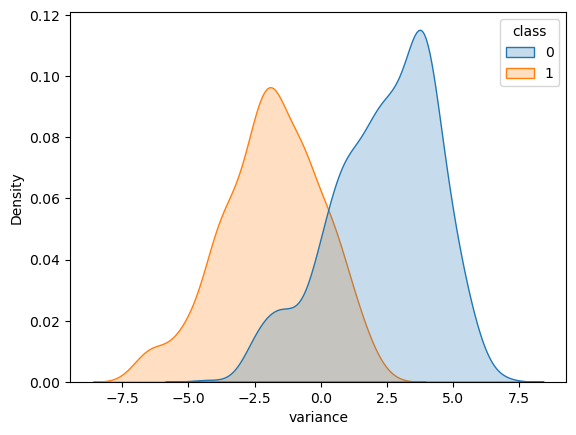

In [33]:
# plot univariate analysis of variance using kdeplot
sns.kdeplot(data=df, x='variance', hue='class', fill=True)

<Axes: xlabel='skewness', ylabel='Density'>

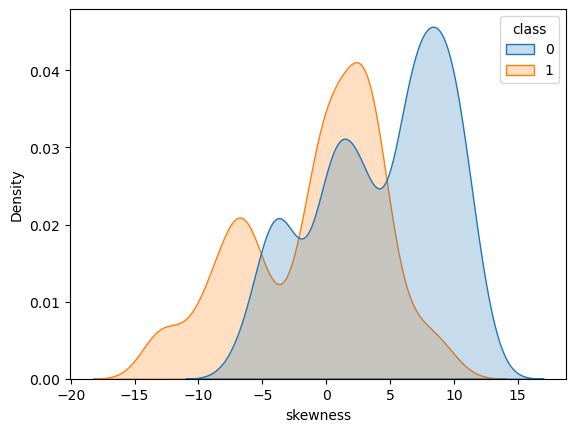

In [34]:
## plot univariate analysis of variance using kdeplot
sns.kdeplot(data=df, x='skewness', hue='class', fill=True)

<Axes: xlabel='kurtosis', ylabel='Density'>

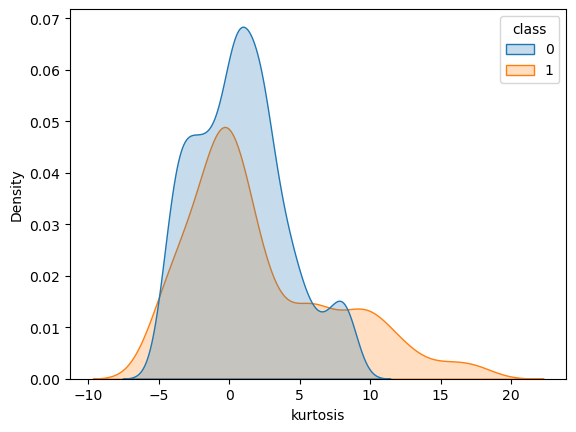

In [35]:
## plot univariate analysis of variance using kdeplot
sns.kdeplot(data=df, x='kurtosis', hue='class', fill=True)

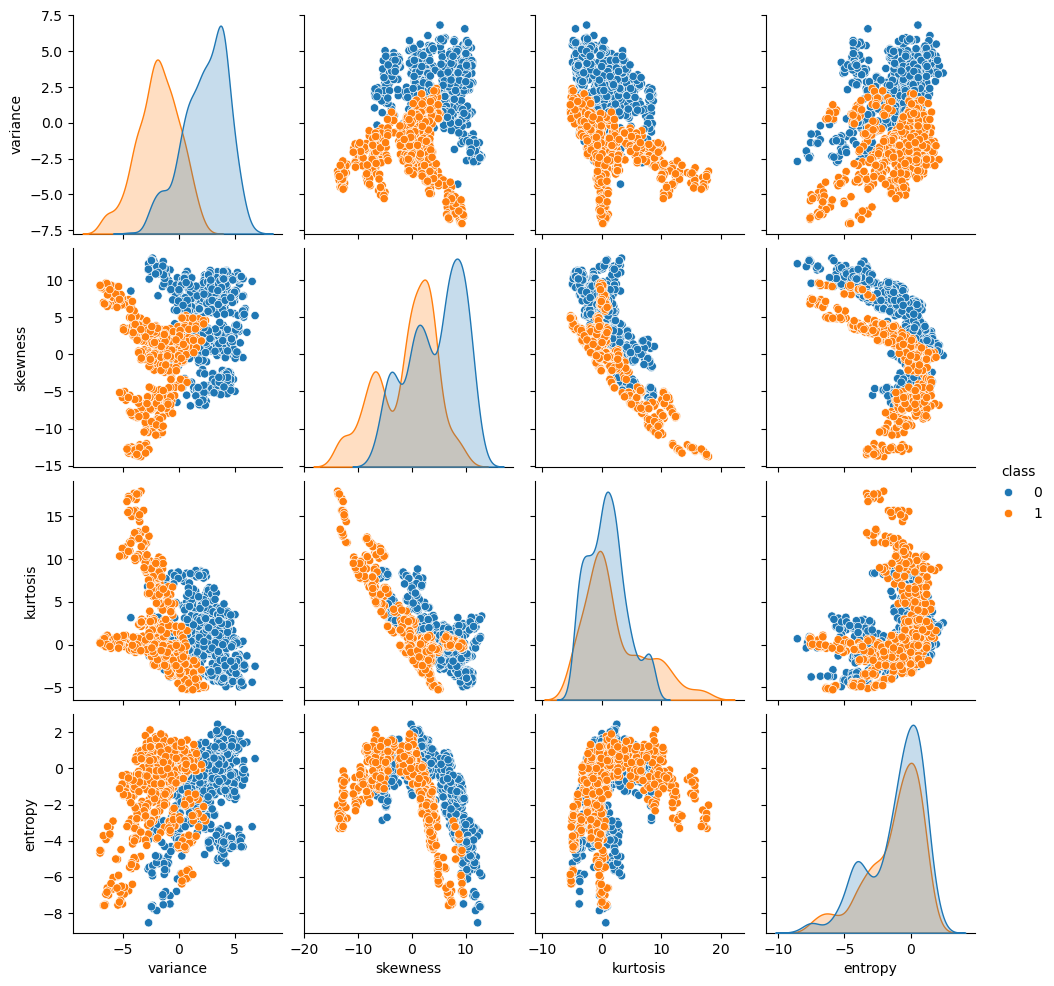

In [36]:
# use pairplot to visualize the data
sns.pairplot(df, hue='class')

<Axes: >

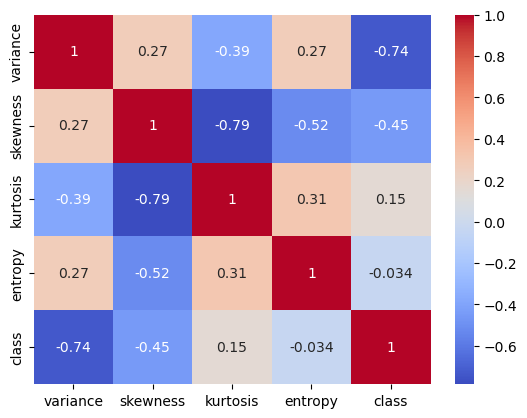

In [37]:
# check correlation of the features using heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### `Feature Engineering`

In [38]:
# seletect target and features
X = df[['variance', 'skewness', 'kurtosis', 'entropy']] # features
y = df['class'] # target

### `Split The Dataset`

In [39]:
# slitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print the shape of the training and testing set
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1078, 4) (270, 4) (1078,) (270,)
